Observations in Training Part 7211
Observations in Testing Part 3091
CAR_USE
Commercial    0.367771
Private       0.632229
dtype: float64

 0.5757885921652554
CAR_USE
Commercial    0.367842
Private       0.632158
dtype: float64

 0.4241371825482961

Probability(Commercial in training):  0.6999596538317057

Probability(private in testing):  0.29997652823125087
accuracy score: 0.5241022322872857
misclassification rate present:  0.4758977677127143


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Us

Area Under Curve 0.7876293267581822
Root Mean Squared Error 0.44894642832199194


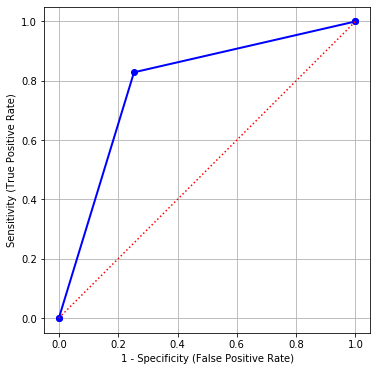

In [2]:
import pandas as pd
import math
from collections import Counter
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import metrics

dataset = pd.read_csv('claim_history.csv')
 # Q1 A-B
y = dataset[['CAR_USE']]
X = dataset[['CAR_USE','CAR_TYPE','OCCUPATION','EDUCATION']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=27513,stratify=y)
print('Observations in Training Part',X_train.shape[0])
print('Observations in Testing Part',X_test.shape[0])

print(X_train.groupby('CAR_USE').size()/X_train.shape[0])
partition = list(X_train.groupby('CAR_USE').size()/X_train.shape[0])
resultantValue = partition[0]*0.7 / ((partition[0]*0.7) + (partition[1]*0.3) )
print('\n',resultantValue)


print(X_test.groupby('CAR_USE').size()/X_test.shape[0])
partition = list(X_test.groupby('CAR_USE').size()/X_test.shape[0])
resultantValue = partition[1]*0.3 / ((partition[0]*0.7) + (partition[1]*0.3) )
print('\n',resultantValue)
total_split = Counter(dataset[str(y_train.columns.values[0])])
frequency_table_train = Counter(y_train[str(y_train.columns.values[0])])
pd.DataFrame.from_dict(frequency_table_train,orient='index',columns=['Count'])

frequency_table_test = Counter(y_test[str(y_train.columns.values[0])])
pd.DataFrame.from_dict(frequency_table_test,orient='index',columns=['Count'])

# pa = len(X_train)/ len(dataset)
# probAneg = len(X_test)/len(dataset)
# probOfBA = frequency_table_train['Commercial'] / len(X_train) 
# probOfBAneg = frequency_table_test['Commercial'] / len(X_test)
# print(probOfBA)
# print(probOfBAneg)
# resultantValue = np.divide(np.multiply(pa,probOfBA),np.add(np.multiply(pa,probOfBA),np.multiply(probAneg,probOfBAneg)))
# resultantValue
# probAneg = len(X_train)/ len(dataset)
# print(probAneg)
# pa = len(X_test)/len(dataset)
# print(pa)
# probOfBA = frequency_table_test['Private'] / len(X_test) 
# probOfBAneg = frequency_table_train['Private'] / len(X_train)
# resultantValue = np.divide(np.multiply(pa,probOfBA),np.add(np.multiply(pa,probOfBA),np.multiply(probAneg,probOfBAneg)))
# resultantValue

#Q1-D-E
p = list(X_train.groupby('CAR_USE').size()/X_train.shape[0])
q = list(X_test.groupby('CAR_USE').size()/X_test.shape[0])
result = p[0]*0.7 / ((p[0]*0.7) + (q[0]*0.3) )
print('\nProbability(Commercial in training): ',result)
result = q[1]*0.3/((q[1]*0.3)+(p[1]*0.7))
print('\nProbability(private in testing): ',result)


#Q2
Encode = LabelEncoder()
for i in list(X_train.columns.values):
        X_train[str(i)] = Encode.fit_transform(X_train[str(i)])
for i in list(X_test.columns.values):
        X_test[str(i)] = Encode.fit_transform(X_test[str(i)])
    

clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)
fit = clf.fit(X_train.drop('CAR_USE',axis=1),y_train)
y_pred = clf.predict(X_test.drop('CAR_USE',axis=1))
y_pred = Encode.fit_transform(y_pred)
y_train = Encode.fit_transform(y_train)
print("accuracy score:",metrics.accuracy_score(y_train[:len(y_pred)], y_pred))
#-----------------------------------Q3-A-----------------------------------------------------
print("misclassification rate present: ",1-metrics.accuracy_score(y_train[:len(y_pred)], y_pred))

def predict_class(data):
    if(data['OCCUPATION'] in ('Blue Collar','Student','Unknown')):
        if(data['EDUCATION']<=0.5):
            return [0.68,0.31]
        else:
            return [0.89,0.10]
    else:
        if(data['CAR_TYPE'] in ('Mini Van','SUV','Sports Car')):
            return [0.0,0.99]
        else:
            return [0.53,0.46]
def d_tree(data):
    out_data=np.ndarray(shape=(len(data),2),dtype=float)
    count=0
    for index,row in data.iterrows():
        probability=predict_class(data=row)
        out_data[count]=probability
        count=count+1
    return out_data

pred_prob_y = d_tree(X_test)
pred_prob_y

auc = metrics.roc_auc_score(y_test,y_pred)
Encode = LabelEncoder()
Encode.fit(y_pred)
tf_y_pred = Encode.transform(y_pred)
Encode.fit(y_test)
tf_y_test = Encode.transform(y_test)
RMSE = np.sqrt(metrics.mean_squared_error(tf_y_test, tf_y_pred))
#--------------------------------------Q3-B-C-----------------------------------------------
print('Area Under Curve',auc)
print('Root Mean Squared Error',RMSE)

OMspecificity, Sensitivity, threshhold = metrics.roc_curve(tf_y_test, tf_y_pred)
OMspecificity = np.append([0], OMspecificity)
Sensitivity = np.append([0], Sensitivity)
OMspecificity = np.append(OMspecificity, [1])
Sensitivity = np.append(Sensitivity, [1])
#-------------------------------------Q3-D--------------------------------------------------------
plt.figure(figsize=(6,6))
plt.plot(OMspecificity, Sensitivity, marker = 'o',
         color = 'blue', linestyle = 'solid', linewidth = 2, markersize = 6)
plt.plot([0, 1], [0, 1], color = 'red', linestyle = ':')
plt.grid(True)
plt.xlabel("1 - Specificity (False Positive Rate)")
plt.ylabel("Sensitivity (True Positive Rate)")
ax = plt.gca()
ax.set_aspect('equal')
plt.show()